Name: Qi Li

Student ID: 1005299302

Course: INF2178-Experimental Design for Data Science

Instructor: Shion Guha

Content: Technical Assignment I

In [ ]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [ ]:
# Import datasets and set columns' names to lowercase
data = pd.read_excel('/content/INF2178_A1_data.xlsx', sheet_name=0)
data.columns = data.columns.str.lower()

In [ ]:
# Overview of dataset
data.head()

,occupancy_date,organization_name,program_id,program_name,sector,program_model,overnight_service_type,program_area,service_user_count,capacity_type,capacity_actual_bed,occupied_beds,capacity_actual_room,occupied_rooms
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [ ]:
# Overview of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   occupancy_date          50944 non-null  datetime64[ns]
 1   organization_name       50944 non-null  object        
 2   program_id              50944 non-null  int64         
 3   program_name            50909 non-null  object        
 4   sector                  50944 non-null  object        
 5   program_model           50942 non-null  object        
 6   overnight_service_type  50942 non-null  object        
 7   program_area            50942 non-null  object        
 8   service_user_count      50944 non-null  int64         
 9   capacity_type           50944 non-null  object        
 10  capacity_actual_bed     32399 non-null  float64       
 11  occupied_beds           32399 non-null  float64       
 12  capacity_actual_room    18545 non-null  float6

**EDA**

In [ ]:
# Extract day, month and year for temporal analysis
# Directly apply datetime attributes to the column with data type as 'datatime64[ns]'
data['day'] = data['occupancy_date'].apply(lambda x: x.day)
data['month'] = data['occupancy_date'].apply(lambda x: x.month)
data['year'] = data['occupancy_date'].apply(lambda x: x.year)
data.head()

,occupancy_date,organization_name,program_id,program_name,sector,program_model,overnight_service_type,program_area,service_user_count,capacity_type,capacity_actual_bed,occupied_beds,capacity_actual_room,occupied_rooms,day,month,year
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,1,1,2021
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,1,1,2021
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,1,1,2021
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,1,1,2021
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,1,1,2021


<ipython-input-8-7e67c7a82484>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='capacity_type', palette="coolwarm")


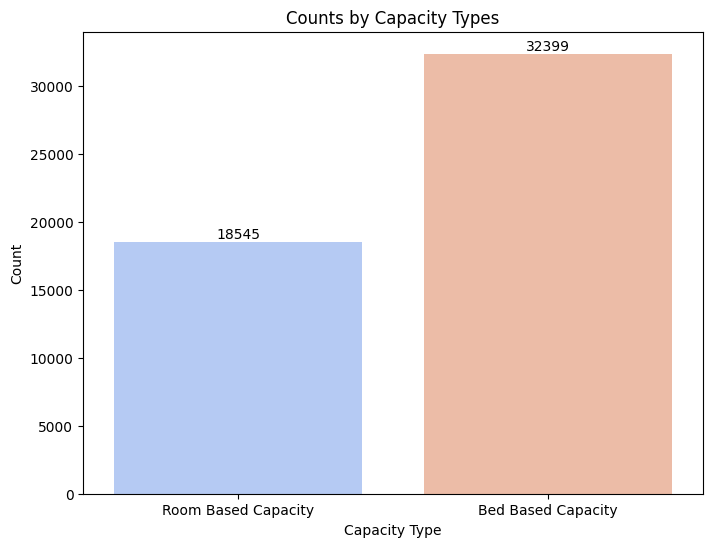

In [ ]:
# Identify unit count for both capacity types

plt.figure(figsize=(8, 6))

# Create a count plot
ax = sns.countplot(data=data, x='capacity_type', palette="coolwarm")

# Add numeric counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Adding labels and title
plt.xlabel('Capacity Type')
plt.ylabel('Count')
plt.title('Counts by Capacity Types')

# Show the plot
plt.show()

There is a notable imbalance of shelter establishments between the two capacity types. To assess its reasonability, I am going to compare it with the actual total users among these two types.

In [ ]:
# Prepare the service user count data by capacity type
room_user_count = data[data['capacity_type'] == 'Room Based Capacity']['service_user_count']
bed_user_count = data[data['capacity_type'] == 'Bed Based Capacity']['service_user_count']

<ipython-input-10-d0f52ed634b1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Capacity Type', y='Total User Count', data=plot_data, palette="coolwarm")


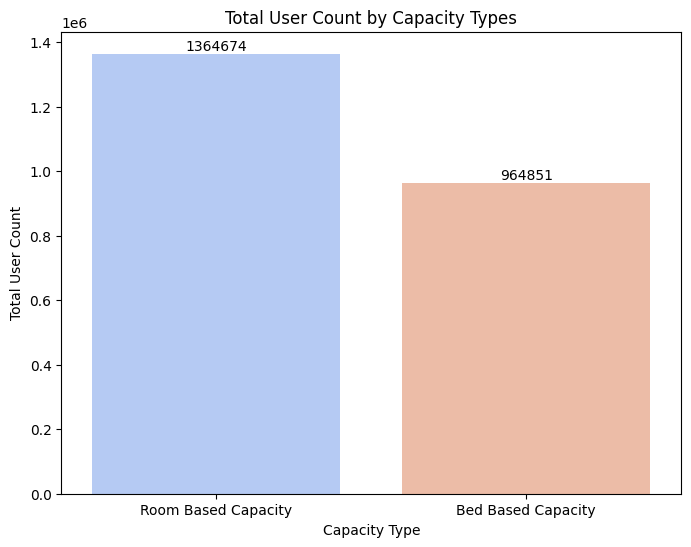

In [ ]:
# Calculate total user count for each capacity type
total_room_user_count = room_user_count.sum()
total_bed_user_count = bed_user_count.sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Capacity Type': ['Room Based Capacity', 'Bed Based Capacity'],
    'Total User Count': [total_room_user_count, total_bed_user_count]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Capacity Type', y='Total User Count', data=plot_data, palette="coolwarm")

# Add numeric counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Adding title
plt.title('Total User Count by Capacity Types')

# Show the plot
plt.show()

The establishments are disproportionate to the actual total users occupied in 2021. This might serve as a reason for the inefficiency of the current shelter program in Toronto, as most applicants are unable to find the right type they are looking for.

<ipython-input-11-6618c30b7fc0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='program_model', palette="coolwarm")


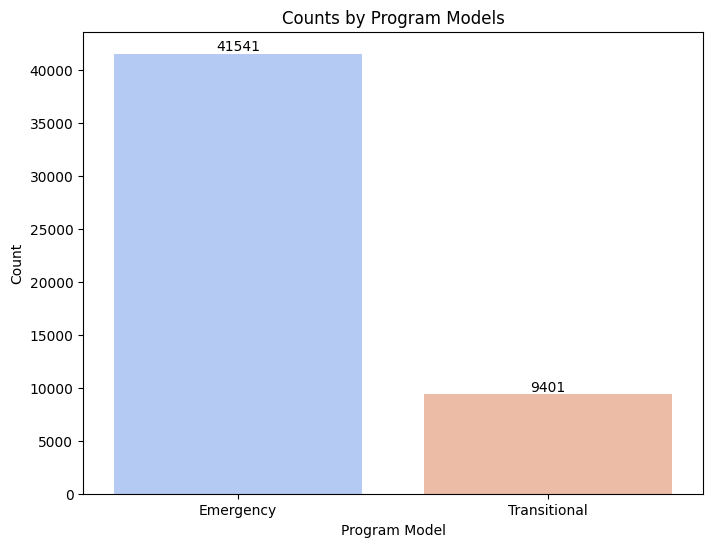

In [ ]:
# Identify unit counts for both program models
plt.figure(figsize=(8, 6))

# Create a count plot
ax = sns.countplot(data=data, x='program_model', palette="coolwarm")

# Add numeric counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Adding labels and title
plt.xlabel('Program Model')
plt.ylabel('Count')
plt.title('Counts by Program Models')

# Show the plot
plt.show()

In [ ]:
# Prepare the service user count data by program model
emergency_user_count = data[data['program_model'] == 'Emergency']['service_user_count']
transitional_user_count = data[data['program_model'] == 'Transitional']['service_user_count']

<ipython-input-13-3aef23ae19c4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Program Model', y='Total User Count', data=plot_data, palette="coolwarm")


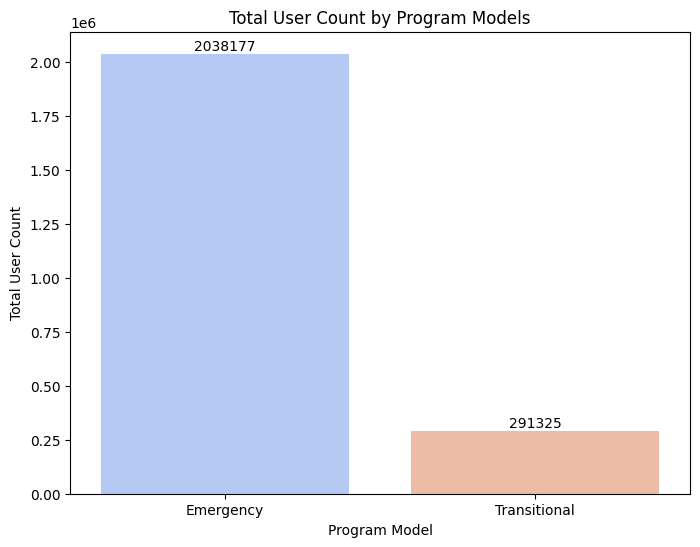

In [ ]:
# Calculate total user count for each program model
total_e_user_count = emergency_user_count.sum()
total_t_user_count = transitional_user_count.sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Program Model': ['Emergency', 'Transitional'],
    'Total User Count': [total_e_user_count, total_t_user_count]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Program Model', y='Total User Count', data=plot_data, palette="coolwarm")

# Add numeric counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Adding title
plt.title('Total User Count by Program Models')

# Show the plot
plt.show()

A similar issue does not exist when assessing the proportion between the two program models and the actual total user counts.

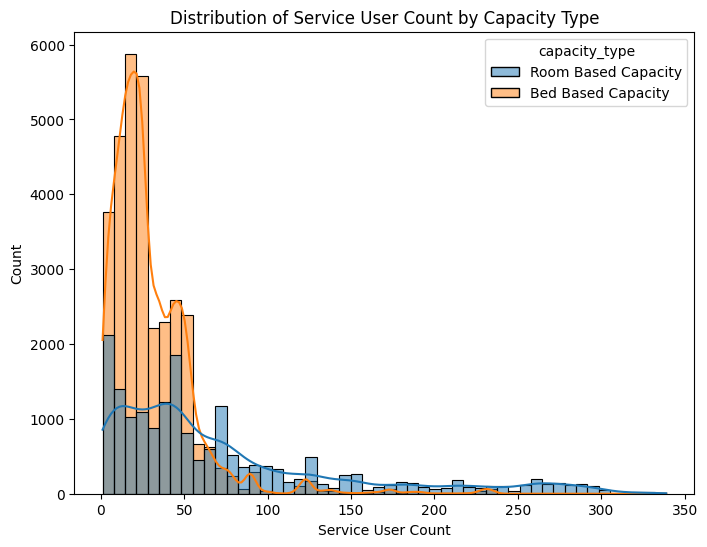

In [ ]:
# visualize the distribution of service user count by capacity_type
plt.figure(figsize=(8, 6))

# Plot the histogram with kernel density estimation
sns.histplot(data = data, x = 'service_user_count', kde = True, bins = 50, hue = 'capacity_type')

# Add labels and titie
plt.xlabel('Service User Count')
plt.title('Distribution of Service User Count by Capacity Type')

# Show the plot
plt.show()

The distributions for both capacity types are right-skewed with bed-based capacity having a more extreme skewness concentrate between 0 and 100. Next, I need to figure out if this is due to more units of bed-based offered.

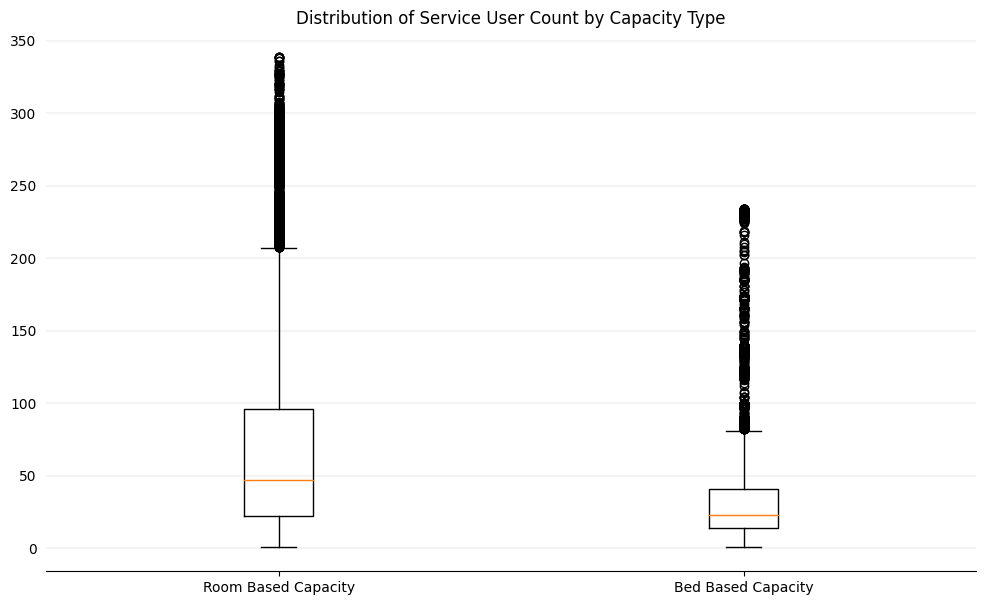

In [ ]:
# Boxplots comparison of service user count by capacity type

fig, ax = plt.subplots(figsize = (12, 7))

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color = 'grey', axis = 'y', linestyle = '-', linewidth = 0.25, alpha = 0.5)

# Set title
ax.set_title('Distribution of Service User Count by Capacity Type')

# Set data and labels to be drawn
dataset = [room_user_count, bed_user_count]
labels = data['capacity_type'].unique()

# Plot the graph
ax.boxplot(dataset, labels = labels)

plt.show()

In [ ]:
# Define function that get the summary statistics
def cal_summary_stat(column):

    mean = np.round(np.mean(column), 2)
    median = np.round(np.median(column), 2)
    min_value = np.round(column.min(), 2)
    max_value = np.round(column.max(), 2)
    quartile_1 = np.round(column.quantile(0.25), 2)
    quartile_3 = np.round(column.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print(f'Min: {min_value}')
    print(f'Mean: {mean}')
    print(f'Max: {max_value}')
    print(f'25th percentile: {quartile_1}')
    print(f'Median: {median}')
    print(f'75th percentile: {quartile_3}')
    print(f'Interquartile range (IQR): {iqr}')

In [ ]:
# Get summary statistics of service user count for room based
cal_summary_stat(room_user_count)

Min: 1
Mean: 73.59
Max: 339
25th percentile: 22.0
Median: 47.0
75th percentile: 96.0
Interquartile range (IQR): 74.0


In [ ]:
# Get summary statistics of service user count for bed based
cal_summary_stat(bed_user_count)

Min: 1
Mean: 29.78
Max: 234
25th percentile: 14.0
Median: 23.0
75th percentile: 41.0
Interquartile range (IQR): 27.0


Midian and interquartile range are both lower for the bed-based capacity while having taller bars in the histogram between 0 and 100. An inference is made that most of the bed-based capacity is occupied by under 100 users.

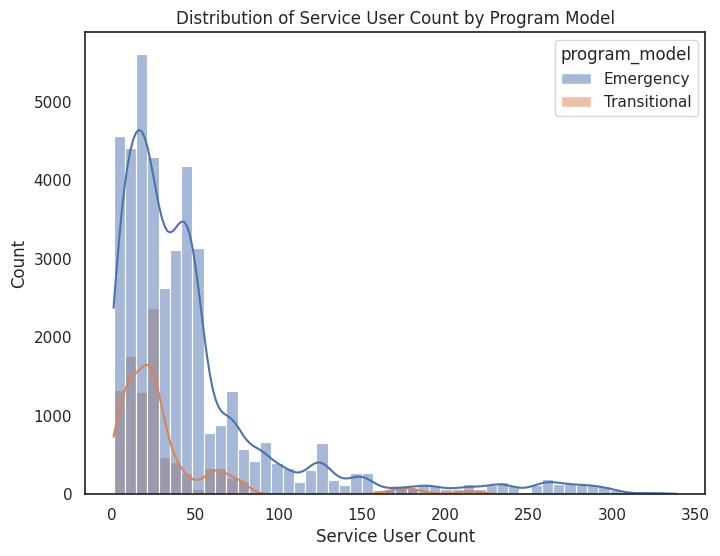

In [ ]:
# visulize the distribution of service user count by program model

plt.figure(figsize=(8, 6))

# Plot the histogram with kernel density estimation
sns.histplot(data = data, x = 'service_user_count', kde = True, bins = 50, hue = 'program_model')

# Set label and title
plt.xlabel('Service User Count')
plt.title('Distribution of Service User Count by Program Model')

plt.show()

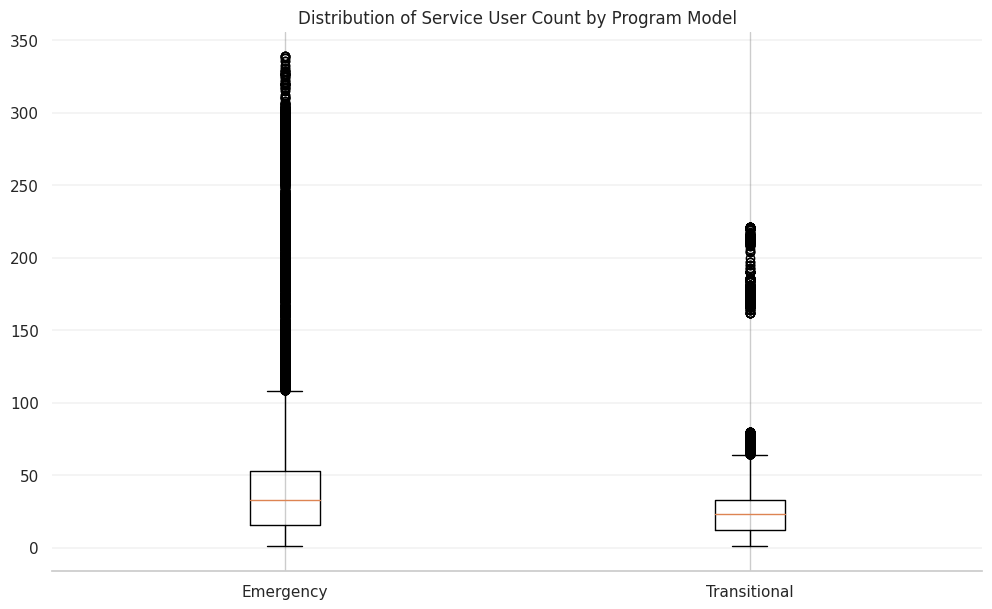

In [ ]:
# Boxplots comparison of service user count by program model
fig, ax = plt.subplots(figsize = (12, 7))

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines along y-axis
ax.grid(color = 'grey', axis = 'y', linestyle = '-', linewidth = 0.25, alpha = 0.5)

ax.set_title('Distribution of Service User Count by Program Model')

# Set data and label to be drawn
dataset = [emergency_user_count, transitional_user_count]
# Drop 'nan' category in the program model column
labels = data.dropna(subset=['program_model'])['program_model'].unique()

# Plot the box plot
ax.boxplot(dataset, labels = labels)

plt.show()

In [ ]:
# Get summary statistics of service user count for emergency
cal_summary_stat(emergency_user_count)

Min: 1
Mean: 49.06
Max: 339
25th percentile: 16.0
Median: 33.0
75th percentile: 53.0
Interquartile range (IQR): 37.0


In [ ]:
# Get summary statistics of service user count for transitional
cal_summary_stat(transitional_user_count)

Min: 1
Mean: 30.99
Max: 221
25th percentile: 12.0
Median: 23.0
75th percentile: 33.0
Interquartile range (IQR): 21.0


Despite the taller bars for the emergency programs in the histogram, the distributions (i.e. shape) look similar among two program models. The medians and interquartile ranges of the two program models are roughly equal. Hence, it's reasonable to conclude that the service_user_count variable doesn't differentiate a lot model-wise.

In [ ]:
# Calculate the occupancy rate for both room based capacity and bed based capacity
data['occupancy_rate'] = np.where(data['capacity_type'] == 'Room Based Capacity',
                                  data['occupied_rooms']/data['capacity_actual_room'],
                                  None)
data['occupancy_rate'] = np.where(data['capacity_type'] == 'Bed Based Capacity',
                                  data['occupied_beds']/data['capacity_actual_bed'],
                                  data['occupancy_rate'])

# Ensure the new column contains all numeric values and there is no missing calculation
data['occupancy_rate'] = pd.to_numeric(data['occupancy_rate'], errors='coerce')
data['occupancy_rate'].isnull().sum()

0

In [ ]:
# Get summary statistics of service user count column in the original dataframe
cal_summary_stat(data['service_user_count'])

Min: 1
Mean: 45.73
Max: 339
25th percentile: 15.0
Median: 28.0
75th percentile: 51.0
Interquartile range (IQR): 36.0


In [ ]:
# Prepare the data of occupancy rate based on capacity type
room_occupancy_rate = data[data['capacity_type'] == 'Room Based Capacity']['occupancy_rate']
bed_occupancy_rate = data[data['capacity_type'] == 'Bed Based Capacity']['occupancy_rate']

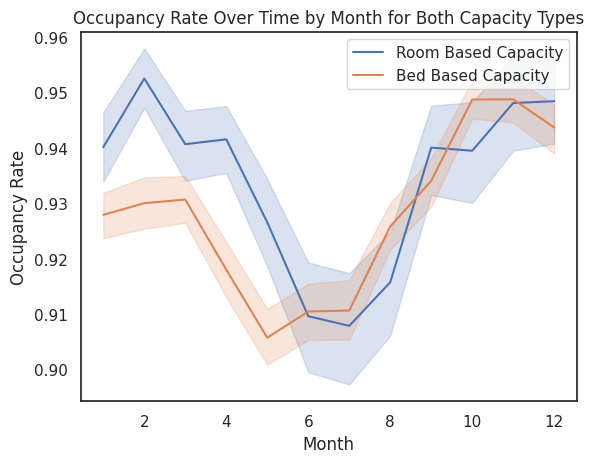

In [ ]:
# Plot line chart for Room Based Capacity
sns.lineplot(x='month', y='occupancy_rate', data=data[data['capacity_type'] == 'Room Based Capacity'], label='Room Based Capacity')

# Plot line chart for Bed Based Capacity
sns.lineplot(x='month', y='occupancy_rate', data=data[data['capacity_type'] == 'Bed Based Capacity'], label='Bed Based Capacity')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Occupancy Rate')
plt.title('Occupancy Rate Over Time by Month by Capacity Types')

# Add legend
plt.legend()

# Display the plot
plt.show()


The occupancy rate fluctuations coincides with temperature changes in Toronto. This observation suggests a potential correlation between weather conditions and shelter usage. An adaptable strategy can be made based on this correlation to address the varying demand for homeless shelter services throughout the year.

**T-test**

*One sample t-test*

Use One sample t-test to see if the population mean of the service_user_count variable is equal to 45.

Null hypothesis: Population mean of service_user_count is equal to 45.

Alternative hypothesis: Population mean of service_user_count is not equal to 45.

In [ ]:
# One sample t-test
t_stat, p_val = st.ttest_1samp(a=data['service_user_count'], popmean = 45)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 3.0778231986607936
p-value = 0.002086292851627579


The calculated p-value is less than the conventional significance level of 0.05. Hence, the null hypothesis is rejected and conclude that we have enough evidence to say the population mean of service_user_count is not 45.

*Welch's t-test*

We were interested in whether there were significant differences in the occupancy rate on average between different program models/capacity types.

In [ ]:
# Check equal variance assumption
var_Room = np.var(room_occupancy_rate)
var_Bed = np.var(bed_occupancy_rate)
print(var_Room)
print(var_Bed)
# Assumption is not met, omit student's t-test and use Welch's t-test

0.026646193633949156
0.015020890621476456


Null hypothesis: There is no significant difference in mean occupancy rate between the two capacity types/program models

Alternative hypothesis: There is a significant difference in mean occupancy rate between the two capacity types/program models.

In [ ]:
# Welch's t-test on occupancy rate between room-based and bed-based capacity
t_stat, p_val = st.ttest_ind(room_occupancy_rate, bed_occupancy_rate, equal_var = False)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 4.498751771925636
p-value = 6.860477551487939e-06


The calculated p-value is less than the 0.05 significance level. Hence the null hypothesis is rejected and conclude that we have enough evidence to say the means of occupancy rate for the two capacity types are not equal.

In [ ]:
# Prepare the data of occupancy rate by program models
emergency_occupancy_rate = data[data['program_model'] == 'Emergency']['occupancy_rate']
transitional_occupancy_rate = data[data['program_model'] == 'Transitional']['occupancy_rate']

In [ ]:
# Check equal variance assumption
var_e = np.var(emergency_occupancy_rate)
var_t = np.var(transitional_occupancy_rate)
print(var_e)
print(var_t)
# Assumption is not met, omit Student's t-test and use Welch's t-test

0.019197967030981325
0.016503406151537652


In [ ]:
# Welch's t-test on occupancy rates of emergency and transitional program models
t_stat, p_val = st.ttest_ind(emergency_occupancy_rate, transitional_occupancy_rate, equal_var = False)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 40.981115372199206
p-value = 0.0


The calculated p-value is less than the 0.05 significance level. Hence, the null hypothesis is rejected and conclude that we have enough evidence to say the means of occupancy rate for the two program models are not equal.